In [122]:
import pandas as pd
import tweepy
import requests
import os
import time
import string
import json
import re
import numpy as np
from IPython.display import Image
from functools import reduce
from IPython.core.display import HTML 
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 9]
import seaborn as sns

## 1. Gather Data

In [3]:
# gather dataset with dog pictures and predictions
if not os.path.exists('dog_pics'):
    os.makedirs('dog_pics')
    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)
response.content

with open(os.path.join('dog_pics', url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)
    
os.listdir('dog_pics')

['image-predictions.tsv']

In [5]:
df = pd.read_csv('twitter-archive-enhanced.csv')
df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [8]:
df.shape

(2356, 17)

In [6]:
pics = pd.read_csv('dog_pics/image-predictions.tsv',sep = '\t')
pics.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [ ]:
#___________--------------------------------------------------------

In [7]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = HIDDEN
consumer_secret = HIDDEN
access_token = HIDDEN
access_secret = HIDDEN

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API

tweet_ids = df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
1062: 741303864243200000
Success
10

Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
1311: 707038192327901184
Success
13

Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
1560: 688547210804498433
Success
1561: 688519176466644993
Success
15

Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
18

Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
20

Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
23

In [9]:
# list of dictionaries to read tweet's JSON data line by line to later convert to a dataframe
df_list = []
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        status = json.loads(line)
        
        # Append to list of dictionaries
        df_list.append({'tweet_id': status['id'],
                        'retweet_count': status['retweet_count'],
                        'favorite_count': status['favorite_count'],
                        'display_text_range': status['display_text_range']
                       })

# create a dataframe with tweet ID
twitter_df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'display_text_range'])

In [10]:
twitter_df.head()

,tweet_id,retweet_count,favorite_count,display_text_range
0,892420643555336193,7960,37190,"[0, 85]"
1,892177421306343426,5908,31982,"[0, 138]"
2,891815181378084864,3907,24083,"[0, 121]"
3,891689557279858688,8110,40504,"[0, 79]"
4,891327558926688256,8792,38728,"[0, 138]"


In [11]:
twitter_df.shape

(2333, 4)

## 2. Assess Data

### Visual Assessing

In [11]:
#Dataset from WeRateDogs Twitter archive
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [12]:
#Dataset of the tweet image prediction
pics

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [12]:
#Dataset of tweets from Twitter API
twitter_df

,tweet_id,retweet_count,favorite_count,display_text_range
0,892420643555336193,7960,37190,"[0, 85]"
1,892177421306343426,5908,31982,"[0, 138]"
2,891815181378084864,3907,24083,"[0, 121]"
3,891689557279858688,8110,40504,"[0, 79]"
4,891327558926688256,8792,38728,"[0, 138]"
5,891087950875897856,2923,19470,"[0, 138]"
6,890971913173991426,1942,11356,"[0, 140]"
7,890729181411237888,17732,62725,"[0, 118]"
8,890609185150312448,4024,26782,"[0, 122]"
9,890240255349198849,6925,30676,"[0, 133]"


### Programmatic assesment

#### Dataset from WeRateDogs Twitter archive

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
sum(df.tweet_id.duplicated())

0

In [16]:
sum(df.timestamp.duplicated())

0

In [17]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [19]:
df.retweeted_status_user_id.value_counts()

4.196984e+09    156
4.296832e+09      2
5.870972e+07      1
6.669901e+07      1
4.119842e+07      1
7.475543e+17      1
7.832140e+05      1
7.266347e+08      1
4.871977e+08      1
5.970642e+08      1
4.466750e+07      1
1.228326e+09      1
7.992370e+07      1
2.488557e+07      1
7.874618e+17      1
3.638908e+08      1
5.128045e+08      1
8.117408e+08      1
1.732729e+09      1
1.960740e+07      1
1.547674e+08      1
3.410211e+08      1
7.124572e+17      1
2.804798e+08      1
1.950368e+08      1
Name: retweeted_status_user_id, dtype: int64

In [20]:
df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [21]:
df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [22]:
df.name.value_counts()

None           745
a               55
Charlie         12
Lucy            11
Cooper          11
Oliver          11
Lola            10
Tucker          10
Penny           10
Winston          9
Bo               9
Sadie            8
the              8
Buddy            7
Toby             7
Bailey           7
Daisy            7
an               7
Jax              6
Koda             6
Scout            6
Rusty            6
Dave             6
Oscar            6
Bella            6
Jack             6
Milo             6
Leo              6
Stanley          6
Oakley           5
              ... 
Dug              1
Willow           1
Fiji             1
Jomathan         1
Flurpson         1
Clarkus          1
JD               1
Willem           1
Stefan           1
Autumn           1
Tess             1
Bowie            1
Ralph            1
Snicku           1
Enchilada        1
Jett             1
his              1
Dook             1
Charleson        1
Shakespeare      1
Orion            1
Mac         

In [23]:
df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [24]:
df.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [25]:
df.tweet_id.duplicated().sum()

0

#### Dataset of the tweet image prediction

In [26]:
pics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
pics.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [59]:
pics.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [29]:
# number of pictures that are same because they come from same source, same link 
sum(pics.jpg_url.duplicated())

66

In [30]:
pics.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Staffordshire_bullterrier     20
Siberian_husky                20
German_shepherd               20
Cardigan                      19
web_site                      19
Eskimo_dog                    18
Shetland_sheepdog             18
teddy                         18
beagle                        18
Maltese_dog                   18
Shih-Tzu                      17
Rottweiler                    17
Lakeland_terrier              17
kuvasz                        16
Italian_greyhound             16
          

In [31]:
pics.tweet_id.duplicated().sum()

0

For a closer examination of data I have set up few cells for myself to be able to plug a tweet id into and check different information about it. I found it to be useful. Here for example I checked the details of a tweet with numirator of 84 and denominator of 70. And it looks like this rating is udjusted for several dogs that are on a picture. It is also fun and exciting to be able to see some of the tweet pictures as I investigate the dataset.  

In [204]:
#check the row for individual id
pics.query('tweet_id == "820690176645140481"')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1728,820690176645140481,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,2,West_Highland_white_terrier,0.872064,True,kuvasz,0.059526,True,Samoyed,0.0374,True


In [232]:
#check the tweet text for individual id from archive dataset
text = df.query('tweet_id == "786709082849828864"').text.values[0]
text

"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"

In [202]:
#get the picture url and show the picture 
image = pics.query('tweet_id == "820690176645140481"').jpg_url.values[0]
image

'https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg'

In [203]:
#using python HTML functionalities to show the image
Image(url= image, width=200, height=400)

#### Dataset of tweets and likes from Twitter API

In [13]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 4 columns):
tweet_id              2333 non-null int64
retweet_count         2333 non-null int64
favorite_count        2333 non-null int64
display_text_range    2333 non-null object
dtypes: int64(3), object(1)
memory usage: 73.0+ KB


In [14]:
twitter_df.tweet_id.duplicated().sum()

0

In [15]:
twitter_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.333000e+03,2333.000000,2333.000000
mean,7.419279e+17,2797.875268,7753.072868
std,6.820607e+16,4735.786779,12035.680371
min,6.660209e+17,1.000000,0.000000
25%,6.782786e+17,561.000000,1346.000000
50%,7.184547e+17,1307.000000,3377.000000
75%,7.986654e+17,3258.000000,9515.000000
max,8.924206e+17,80401.000000,160704.000000


### Quality

- The WeRateDogs archive dataset contains retweets and therefore - duplicated tweets.
- Some tweets are responses to the original tweets. Those do not have pictures and are reference one of already existing tweets.
- Some names of dogs in the WeRateDogs archive dataset are missing, having None value. Some names are represented as articles “a”, “an”, “the” or other words.
- Datatype for columns “tweet_id” is represented as integer, more appropriate datatype is string.
- Datatype for “timestamp” is string/object, more appropriate data type is date/time object.
- The scores(numerator and denominator columns) for tweets id 682962037429899265, 666287406224695296 and 740373189193256964, 810984652412424192 are wrong because in the tweet text 9/11 and 7/11, and 3 1/2, 24/7 appeared before the score numbers, which were just a part of the sentance - not a score. 
- Some tweets are containing decimal numbers for numerators but only the part after decimal point was translated to the dataset as a numerator.
- Some denominators in the WeRateDogs archive dataset are more then 10.
- The image prediction dataset has 66 duplicated image urls, therefore are same images.  
- Breed names in the image prediction dataset represented inconsistently. Some start with an upper case letter, others with lower case.

### Tidiness
- The "in_reply_to_status_id","in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp" columns in the WeRateDog archive will be unnecessary after quality cleaning 
- The image prediction table has several columns with breed prediction of different confidence level. Some of the predictions are not even names of breeds. 
- Data for this analysis is presented in 3 different tables.
- The "display_text_range" column of the Twitter API table contains some metadata about the tweet text wich I dont find useful.
- Separate columns for categorical data of dog stages "doggo", "puppo", "pupper", "floofer".

## Clean Data

In [137]:
# Create a copy of the archive dataset for cleaning 
df_archive_clean = df.copy()

In [138]:
# Create a copy of the image prediction dataset
pics_clean = pics.copy()

In [139]:
# Create a copy of dataset from the Twitter API 
twitter_clean = twitter_df.copy()

### Quality

#### Define
> The WeRateDogs archive dataset contains retweets and therefore - duplicated tweets. 
Create a new dataset containing only original tweets, omitting the duplicated retweetted instances using isnull() method.

#### Code

In [140]:
#separate data frame where "retweeted_status_id" has null values
df_archive_clean = df_archive_clean[df_archive_clean.retweeted_status_id.isnull()]

#### Test

In [141]:
len(df_archive_clean[df_archive_clean.retweeted_status_id.isnull() == False])

0

#### Define
> Some tweets are responces to the original tweets. Those do not have pictures and are reference one of already existing tweets. I will separate these tweet ids from the clean dataset, by selecting them using isnull() method applied to "in_reply_to_user_id" column.

#### Code

In [142]:
#here are the data frame with all replies, 
#we can see that "in_reply_to_user_id" and "in_reply_to_status_id" are not empty 

df_archive_clean[df_archive_clean.in_reply_to_user_id.isnull()==False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [143]:
#separate the data frame where "in_reply_to_user_id" has null values
df_archive_clean = df_archive_clean[df_archive_clean.in_reply_to_user_id.isnull()]

#### Test

In [144]:
len(df_archive_clean[df_archive_clean.in_reply_to_user_id.isnull()==False])

0

#### Define
>Dog names are missing or represented by random words. Replace all values wich are not names with "namless" word. I will use regular expressions combined with method srt() and match() to find incorrect names in the "name" column.

#### Code

In [145]:
#match and replace all name values that are None or start with lower letter 
df_archive_clean['name'][df_archive_clean['name'].str.match('None|[a-z]+')] = 'nameless'

#### Test

In [146]:
df_archive_clean.name.value_counts()

nameless      707
Lucy           11
Charlie        11
Cooper         10
Oliver         10
Penny           9
Tucker          9
Sadie           8
Winston         8
Lola            8
Toby            7
Daisy           7
Bailey          6
Oscar           6
Stanley         6
Koda            6
Bo              6
Bella           6
Jax             6
Chester         5
Rusty           5
Leo             5
Scout           5
Milo            5
Buddy           5
Louis           5
Dave            5
Bentley         5
Sophie          4
Alfie           4
             ... 
Erik            1
Terrance        1
Rey             1
Lucia           1
Beebop          1
Buckley         1
Superpup        1
Bradley         1
Deacon          1
Charl           1
Joey            1
Liam            1
Seamus          1
Dietrich        1
Ralph           1
Luther          1
Brownie         1
Mojo            1
Kara            1
Christoper      1
Snoopy          1
Oddie           1
Rizzy           1
Biden           1
Baron     

#### Define

>Datatype for columns “tweet_id” is represented as integer. I shall convert it into a string datatype, using method astype().

#### Code

In [147]:
#convert tweet_id to object type
df_archive_clean['tweet_id'] = df_archive_clean['tweet_id'].astype(str)

#### Test

In [148]:
df_archive_clean.tweet_id.dtypes

dtype('O')

#### Define

>Datatype for “timestamp” is string/object. Convert it to date/time object insted. The to_datetime() method from pandas should work here.

#### Code

In [149]:
#convert timestamp to date/time type
df_archive_clean['timestamp'] = pd.to_datetime(df_archive_clean['timestamp'])

#### Test

In [150]:
df_archive_clean.timestamp.dtypes

datetime64[ns, UTC]

#### Define

>Scores(numerator and denominator columns) for tweets id 682962037429899265, 666287406224695296 and 740373189193256964, 810984652412424192 are wrong because in the tweet text 9/11 and 7/11, and 3 1/2, 24/7 appeared before the score numbers, which were just a part of the sentance - not a score. I will manually replace those tweet scores. 

>I decided to add images to this part for better effect.

#### Code

In [151]:
#dataframe representing tweet ids in question
df_archive_clean.query('rating_denominator < 20').query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,nameless,None,None,None,None
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,nameless,None,None,None,None


#### 1. Tweet id 810984652412424192, row 516

In [152]:
#shows image based on tweet id 
image = pics.query('tweet_id == "810984652412424192"').jpg_url.values[0]
Image(url= image, width=200, height=400)

In [153]:
#investigate text of the tweet 
text = df.query('tweet_id == "810984652412424192"').text.values[0]
text

'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'

>As we see from the closer look in the text, there was no score given to Sam. So that Sam does not feel sad, I will give him the score 10/10. 

In [154]:
#using .loc method with number of the row and the column name  
df_archive_clean.loc[516,'rating_numerator'] = 10

In [155]:
df_archive_clean.loc[516, 'rating_denominator'] = 10

#### Test 1. 

In [156]:
df_archive_clean.query('tweet_id == "810984652412424192"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",10,10,Sam,None,None,None,None


#### 2. Tweet id 740373189193256964, row 1068

In [157]:
#shows image based on tweet id
image = pics.query('tweet_id == "740373189193256964"').jpg_url.values[0]
Image(url= image, width=200, height=400)

In [158]:
#investigate text of the tweet 
text = df.query('tweet_id == "740373189193256964"').text.values[0]
text

'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ'

In [159]:
df_archive_clean.loc[1068,'rating_numerator'] = 14
df_archive_clean.loc[1068, 'rating_denominator'] = 10

#### Test 2.

In [160]:
df_archive_clean.query('tweet_id == "740373189193256964"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,14,10,nameless,None,None,None,None


#### 3. Tweet id 682962037429899265, row 1662

In [161]:
#shows image based on tweet id
image = pics.query('tweet_id == "682962037429899265"').jpg_url.values[0]
Image(url= image, width=200, height=400)

In [162]:
#investigate text of the tweet 
text = df.query('tweet_id == "682962037429899265"').text.values[0]
text

'This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5'

In [163]:
df_archive_clean.loc[1662,'rating_numerator'] = 10
df_archive_clean.loc[1662, 'rating_denominator'] = 10

#### Test 3.

In [164]:
df_archive_clean.query('tweet_id == "682962037429899265"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037...,10,10,Darrel,None,None,None,None


#### 4. Tweet id 666287406224695296, row 2335

In [165]:
#shows image based on tweet id
image = pics.query('tweet_id == "666287406224695296"').jpg_url.values[0]
Image(url= image, width=200, height=400)

In [166]:
#investigate text of the tweet 
text = df.query('tweet_id == "666287406224695296"').text.values[0]
text

'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'

In [167]:
df_archive_clean.loc[2335,'rating_numerator'] = 9
df_archive_clean.loc[2335, 'rating_denominator'] = 10

#### Test 4.

In [168]:
df_archive_clean.query('tweet_id == "666287406224695296"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,9,10,nameless,None,None,None,None


#### Test total
> After adjusting tweet ratings above we can see that there are no denominators left that are less then 10 or are odd numbers. 

In [257]:
df_archive_clean.rating_denominator.value_counts()


10     2084
50        3
80        2
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
Name: rating_denominator, dtype: int64

#### Define
> Some tweets are containing decimal numbers for numerators but only the part after decimal point was translated to the dataset as a numerator. This causing an incorrect values fot ratings. I will manually adjust the numerator for these tweet to correct the ratings for each of such cases using iloc. 

#### Code

In [170]:
#find all instances of desimal values for rating
with pd.option_context('max_colwidth', 200):
    display(df_archive_clean[df_archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")][[ 'text']])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,text
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948"
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD


In [171]:
#adjust the numerators
df_archive_clean.loc[45,'rating_numerator'] = 13.5
df_archive_clean.loc[695,'rating_numerator'] = 9.75
df_archive_clean.loc[763,'rating_numerator'] = 11.27
df_archive_clean.loc[1712,'rating_numerator'] = 11.26


#### Test

In [172]:
display(df_archive_clean[df_archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")][[ 'text', 'rating_numerator']])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,13.50
695,"This is Logan, the Chow who lived. He solemnly...",9.75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27
1712,Here we have uncovered an entire battalion of ...,11.26


#### Define
> Some denominators in the WeRateDogs archive dataset are more then 10. The assesment part of this dataset showed that denominators that are more then 10 are such because the tweets are about multiple dogs. The pictures attached to these tweets include several dogs, therefore the score is forall of them. To resolve this issue, I decided to make a separate column called "rating". I would divide numerator by denominator and multiply by 10 to get a uniform rating for the whole dataset. 

#### Code

In [173]:
#after the calculating use astype() to store the result to float type
df_archive_clean['rating'] = 10 * df_archive_clean['rating_numerator'] / df_archive_clean['rating_denominator'].astype(float)

#### Test

In [174]:
#sample of denominators over 10 to check how new rating was applied
df_archive_clean.query('rating_denominator > 10').sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,45.0,50,nameless,None,None,None,None,9.0
1433,697463031882764288,NaN,NaN,2016-02-10 16:51:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a bucket of pups. 44/40...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697463031...,44.0,40,nameless,None,None,None,None,11.0
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84.0,70,nameless,None,None,None,None,12.0
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99.0,90,nameless,None,None,None,None,11.0
1843,675853064436391936,NaN,NaN,2015-12-13 01:41:41+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have an entire platoon of puppers. Tot...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675853064...,88.0,80,nameless,None,None,None,None,11.0
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80.0,80,nameless,None,None,None,None,10.0
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204.0,170,nameless,None,None,None,None,12.0
1635,684222868335505415,NaN,NaN,2016-01-05 04:00:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684222868...,121.0,110,nameless,None,None,None,None,11.0
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4.0,20,nameless,None,None,None,None,2.0
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50.0,50,Bluebert,None,None,None,None,10.0


#### Define

After adjusting the rating and assessing the dataset using the describe() method. I've noticed strange rating that stood out as max of 1776. After the closer investigation I found that it is indeed a correct numerator, referensing the significant year in US history. This numerator is rather symbolic and does not represent actual raiting,  therefore I have two choices: drop Atticus from the dataset or assign the rating numerator myself. Objectivity is important, but it would be too cruel to leave Atticus out of this analysis therefore I decide to assign him rating of 10/10. 

In [241]:
df_archive_clean.rating.describe()

count    2097.000000
mean       11.646056
std        39.628834
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating, dtype: float64

In [176]:
df_archive_clean.query('rating == "1776"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45+00:00,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776.0,10,Atticus,None,None,None,None,1776.0


In [177]:
top_rating = pics.query('tweet_id == "749981277374128128"').jpg_url.values[0]
Image(url= top_rating, width=200, height=400)

#### Code

In [242]:
df_archive_clean.loc[979,'rating_numerator'] = 10

In [248]:
df_archive_clean.loc[979,'rating'] = 10

#### Test

In [249]:
df_archive_clean.query('tweet_id == "749981277374128128"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_stage
979,749981277374128128,2016-07-04 15:00:45+00:00,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,10.0,10,Atticus,10.0,NaN


#### Define
After adjusting high rating for Atticus I've noticed another unusually high rating of 420. By investigating the tweet, I was plesantly surprized to see the picture of Snoop Dogg. Even though you are real "dawg", sorry, Snoop, I will have to drop you.

In [258]:
df_archive_clean.rating.describe()

count    2097.000000
mean       10.803901
std         9.195250
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max       420.000000
Name: rating, dtype: float64

In [259]:
df_archive_clean.query('rating == "420"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_stage
2074,670842764863651840,2015-11-29 05:52:33+00:00,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420.0,10,nameless,420.0,NaN


In [260]:
top_rating = pics.query('tweet_id == "670842764863651840"').jpg_url.values[0]
Image(url= top_rating, width=200, height=400)

In [267]:
# drop the row containing Snoop Dogg
df_archive_clean.drop(2074, inplace=True)

#### Test

In [268]:
df_archive_clean.query('rating == "420"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_stage


In [269]:
df_archive_clean.shape

(2095, 10)

In [270]:
df_archive_clean.rating.describe()

count    2095.000000
mean       10.609442
std         2.152095
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rating, dtype: float64

#### Define 
>The image prediction dataset has 66 duplicated image urls, therefore are same images. I will drop rows with duplicated images using duplicated() functionality of pandas.

#### Code

In [178]:
pics_clean = pics_clean.drop_duplicates(subset=['jpg_url'], keep='last')

#### Test

In [179]:
sum(pics_clean['jpg_url'].duplicated())

0

#### Define 
>Breed names in the image prediction dataset represented inconsistently. Some start with an upper case letter, others with lower case. I will apply str() and lower() method to all columns containing bread names.

#### Code

In [180]:
#sample for referense to minimize scrolling
pics_clean.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [181]:
#use lower() method on all columns containing breed names 
pics_clean['p1'] = pics_clean['p1'].str.lower()
pics_clean['p2'] = pics_clean['p2'].str.lower()
pics_clean['p3'] = pics_clean['p3'].str.lower()

#### Test

In [182]:
#same sample for reference, to show that breed names start with lower case letters instead 
pics_clean.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True


### Tidiness

#### Define
>The "in_reply_to_status_id","in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp" column in the WeRateDog archive will be unnecessary after quality cleaning. I will drop those columns from the dataset. 

#### Code

In [183]:
df_archive_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None,13.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None,13.0


In [184]:
#drop columns from the data frame
df_archive_clean = df_archive_clean.drop(["in_reply_to_status_id","in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"], axis = 1)

#### Test

In [185]:
df_archive_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None,13.0
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None,13.0


#### Define
>Separate columns for categorical data in WeRateDogs archive table. Columns with dog stages "doggo", "puppo", "pupper", "floofer" should be combined into one column "dog_stage". 

#### Code

In [202]:
# function to find all instances of dog stage mentioned in tweet texts
# Reference: https://stackoverflow.com/questions/53107571/pandas-extract-unmatched-word-of-sentence-in-a-column-by-comparing-other-colum
def find_stage(row):
    thelist = ['doggo', 'floofer', 'pupper', 'puppo',]
    slist = row['text'].translate(str.maketrans('', '', string.punctuation)).lower().split()
    
    stages = [x for x in thelist if x in slist]
    stages = ','.join(stages)
    
    return stages
            

In [203]:
# create a column for dog stages
df_archive_clean['dog_stage'] = df.apply(find_stage, axis=1)

In [196]:
df_archive_clean.dog_stage.value_counts()

                 1766
pupper            219
doggo              71
puppo              22
floofer             9
doggo,pupper        8
doggo,floofer       1
doggo,puppo         1
Name: dog_stage, dtype: int64

In [210]:
# assign nan values to rows containing no dog stage
df_archive_clean.loc[df_archive_clean.dog_stage == '', 'dog_stage'] = np.nan

In [ ]:
#drop columns 
df_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [211]:
df_archive_clean.dog_stage.value_counts()

pupper           219
doggo             71
puppo             22
floofer            9
doggo,pupper       8
doggo,floofer      1
doggo,puppo        1
Name: dog_stage, dtype: int64

In [214]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns, UTC]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null int64
name                  2097 non-null object
rating                2097 non-null float64
dog_stage             331 non-null object
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(6)
memory usage: 260.2+ KB


#### Define 
>Multiple columns with breed predictions. One column called "breed" should be created in the image prediction table with values based on p1_dog columns. Since the p1 is the most likely prediction, only one column indecating it would be sufficient for this dataset. However, if the prediction in the p1 False I will need to check for the first True prediction in other two columns. 

#### Code

In [166]:
#dataset sample for referense 
pics_clean.head(12)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,bernese_mountain_dog,0.651137,True,english_springer,0.263788,True,greater_swiss_mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [215]:
#create an empty list to be filed with dog breeds 
breed = []

#funnction that will collect breed names based on the p1 prediction unless it is False,
#then it will check p2 and p3 accordingly

def breed_find(pics_clean):
    if pics_clean['p1_dog'] == True:
        breed.append(pics_clean['p1'])
    elif pics_clean['p2_dog'] == True:
        breed.append(pics_clean['p2'])
    elif pics_clean['p3_dog'] == True:
        breed.append(pics_clean['p3'])
    else:
        breed.append('None')

#apply the function to fill the list with values        
pics_clean.apply(breed_find, axis = 1);

In [216]:
#check the list
breed

['welsh_springer_spaniel',
 'redbone',
 'german_shepherd',
 'rhodesian_ridgeback',
 'miniature_pinscher',
 'bernese_mountain_dog',
 'None',
 'chow',
 'golden_retriever',
 'miniature_poodle',
 'golden_retriever',
 'gordon_setter',
 'walker_hound',
 'pug',
 'bloodhound',
 'lhasa',
 'english_setter',
 'None',
 'None',
 'italian_greyhound',
 'maltese_dog',
 'None',
 'newfoundland',
 'golden_retriever',
 'malamute',
 'None',
 'soft-coated_wheaten_terrier',
 'chihuahua',
 'black-and-tan_coonhound',
 'None',
 'toy_terrier',
 'blenheim_spaniel',
 'pembroke',
 'irish_terrier',
 'chesapeake_bay_retriever',
 'chihuahua',
 'curly-coated_retriever',
 'dalmatian',
 'ibizan_hound',
 'border_collie',
 'german_shepherd',
 'labrador_retriever',
 'miniature_poodle',
 'miniature_pinscher',
 'italian_greyhound',
 'None',
 'english_setter',
 'miniature_schnauzer',
 'maltese_dog',
 'airedale',
 'None',
 'None',
 'rottweiler',
 'None',
 'golden_retriever',
 'chesapeake_bay_retriever',
 'None',
 'chihuahua',
 

In [217]:
#add new column to the data frame based on the list created
pics_clean['breed'] = breed

In [218]:
pics_clean.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True,welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True,redbone


In [219]:
# drop all prediction columns except for new 'breed' column
pics_clean = pics_clean.drop(['p1','p1_conf','p1_dog','p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1)

#### Test

In [220]:
pics_clean.head(2)

,tweet_id,jpg_url,img_num,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone


#### Define
> The "display_text_range" column some metadata about the tweet text. In my opinion, it is not particularly usefull for the analysis. Therefore I will drop that column from the dataset. 

#### Code

In [221]:
twitter_clean.head(2)

,tweet_id,retweet_count,favorite_count,display_text_range
0,892420643555336193,7960,37190,"[0, 85]"
1,892177421306343426,5908,31982,"[0, 138]"


In [222]:
#drop "display_text_range" 
twitter_clean = twitter_clean.drop(['display_text_range'], axis =1)

#### Test

In [223]:
twitter_clean.head(2)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7960,37190
1,892177421306343426,5908,31982


#### Define
> There are three separate datasets to do analysis on. All datasets must be merged into one, therefore to make the analysis process more effective. I will use pandas merge() method to do so. I will merge on "tweet_id" column. However, I have noticed that I have adjusted the datatype of "tweet_id" to object only on the WeRateDogs archive dataset and not on others two. This will create a problem while merging so I will first make sure that "tweet_id" column has the same datatype of object. 

#### Code

In [224]:
#confirm tweet_id is an object type
df_archive_clean.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                  float64
rating_denominator                  int64
name                               object
rating                            float64
dog_stage                          object
dtype: object

In [225]:
pics_clean.dtypes

tweet_id     int64
jpg_url     object
img_num      int64
breed       object
dtype: object

In [227]:
#adjusting tweet_id of the image prediction dataset to object
pics_clean['tweet_id'] = pics_clean['tweet_id'].astype(str)

In [228]:
pics_clean.tweet_id.dtypes

dtype('O')

In [229]:
twitter_clean.dtypes

tweet_id          int64
retweet_count     int64
favorite_count    int64
dtype: object

In [231]:
#adjusting tweet_id in the twitter dataset to object
twitter_clean['tweet_id'] = twitter_clean['tweet_id'].astype(str)

In [232]:
twitter_clean.tweet_id.dtypes

dtype('O')

In [271]:
# to merge more then 2 data frames I will put them in a list
# Reference: https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns
frames = [df_archive_clean, pics_clean, twitter_clean]
# use lambda and reduce() operation to merge data frames
df_master_clean = reduce(lambda left,right: pd.merge(left,right,on='tweet_id', how = 'inner'), frames) 

#### Test

In [234]:
df_master_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_stage,jpg_url,img_num,breed,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,13.0,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,None,7960,37190
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,13.0,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,5908,31982
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,12.0,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,3907,24083
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,13.0,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,labrador_retriever,8110,40504
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,12.0,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,8792,38728


### Assess master dataset 

In [235]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1899 entries, 0 to 1898
Data columns (total 15 columns):
tweet_id              1899 non-null object
timestamp             1899 non-null datetime64[ns, UTC]
source                1899 non-null object
text                  1899 non-null object
expanded_urls         1899 non-null object
rating_numerator      1899 non-null float64
rating_denominator    1899 non-null int64
name                  1899 non-null object
rating                1899 non-null float64
dog_stage             287 non-null object
jpg_url               1899 non-null object
img_num               1899 non-null int64
breed                 1899 non-null object
retweet_count         1899 non-null int64
favorite_count        1899 non-null int64
dtypes: datetime64[ns, UTC](1), float64(2), int64(4), object(8)
memory usage: 237.4+ KB


In [236]:
df_master_clean.describe()

,rating_numerator,rating_denominator,rating,img_num,retweet_count,favorite_count
count,1899.000000,1899.000000,1899.000000,1899.000000,1899.000000,1899.000000
mean,12.189458,10.500263,11.634429,1.200632,2318.025276,7967.362296
std,42.386762,6.978242,41.642380,0.556861,4097.792236,11708.400947
min,0.000000,10.000000,0.000000,1.000000,11.000000,75.000000
25%,10.000000,10.000000,10.000000,1.000000,554.000000,1748.000000
50%,11.000000,10.000000,11.000000,1.000000,1181.000000,3642.000000
75%,12.000000,10.000000,12.000000,1.000000,2632.500000,9688.500000
max,1776.000000,170.000000,1776.000000,4.000000,80401.000000,160704.000000


## Store data 

In [272]:
# Save the master dataframe to CSV file
df_master_clean.to_csv('twitter_archive_master.csv', index = False, encoding = 'utf-8')

## Analyze and Visualize 

In [273]:
#read new dataframe from new CSV file
master = pd.read_csv('twitter_archive_master.csv')
master.sample(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_stage,jpg_url,img_num,breed,retweet_count,favorite_count
1120,691675652215414786,2016-01-25 17:35:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Richie and Plip. They are the best of ...,https://twitter.com/dog_rates/status/691675652...,10.0,10,Richie,10.0,NaN,https://pbs.twimg.com/media/CZlTVL4WkAEpVR5.jpg,1,chihuahua,522,1994
488,783391753726550016,2016-10-04 19:42:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Godi. He's an avid beachgoer and part tim...,https://twitter.com/dog_rates/status/783391753...,13.0,10,Godi,13.0,NaN,https://pbs.twimg.com/media/Ct8qn8EWIAAk9zP.jpg,4,norwegian_elkhound,5778,17625


### 1. Corelation between highest ratings and number of retweets
>Does the high rating always means retweet?

In [274]:
master.rating.describe()

count    1897.000000
mean       10.489605
std         2.185947
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rating, dtype: float64

In [275]:
master.retweet_count.describe()

count     1897.000000
mean      2315.895625
std       4097.101817
min         11.000000
25%        554.000000
50%       1181.000000
75%       2629.000000
max      80401.000000
Name: retweet_count, dtype: float64

By colser examination I find that the most retweeted post does not have max rating of 14, it's rating is 13. 

In [276]:
#number of tweets with the max rating
len(master.query('rating == "14"'))

31

In [280]:
#rating of the most retweeted 
master.query('retweet_count == "80401"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_stage,jpg_url,img_num,breed,retweet_count,favorite_count
722,744234799360020481,2016-06-18 18:26:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13.0,10,nameless,13.0,doggo,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,labrador_retriever,80401,160704


In [278]:
top_retweet = pics.query('tweet_id == "744234799360020481"').jpg_url.values[0]
Image(url= top_retweet, width=200, height=400)

In [281]:
#find correlation between two columns. 
master['rating'].corr(master['retweet_count'])

0.2890831638152217

#### 1. Insight
> The correlation between rating of a dog and number of retweets for a post is weak. It is an understandable result because ratings given to dogs are not objective and often given in a context of funny tweet text.  

#### Now I will create a correlation matrics for the whole dataset to see if there is any strong corrlation between any columns.

In [282]:
#the whole dataset correlation map
corr = master.corr()
corr.style.background_gradient(cmap='coolwarm')

,tweet_id,rating_numerator,rating_denominator,rating,img_num,retweet_count,favorite_count
tweet_id,1,0.124396,-0.0172151,0.53113,0.219984,0.403451,0.635506
rating_numerator,0.124396,1,0.961461,0.286563,0.0353903,0.0611469,0.080554
rating_denominator,-0.0172151,0.961461,1,0.0198665,-0.0177359,-0.0164798,-0.0238602
rating,0.53113,0.286563,0.0198665,1,0.194656,0.289083,0.388588
img_num,0.219984,0.0353903,-0.0177359,0.194656,1,0.106076,0.133855
retweet_count,0.403451,0.0611469,-0.0164798,0.289083,0.106076,1,0.924798
favorite_count,0.635506,0.080554,-0.0238602,0.388588,0.133855,0.924798,1


There are two areas stand out in the correlation matrix: rating_numerator to rating_denominato and favorite_count to retweet_count. Since we are using "rating" column fo rating first correlation is not important. However the correlation between favorite_count and retweet_count could be explored further. 

### 2. Rlationsihp between number of favorites and number of retweets.
>What kind of correlation is there between number of favorites and retweets? 

In [283]:
#strong positive correlation
master['favorite_count'].corr(master['retweet_count'])

0.9247983787006745

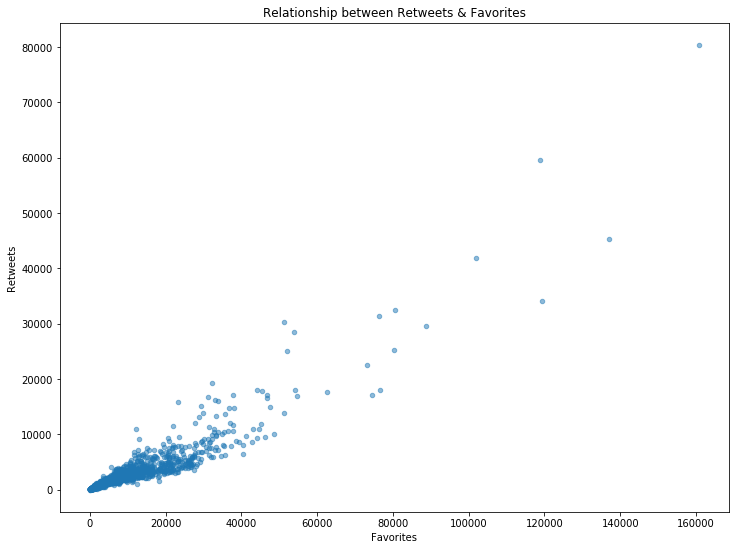

In [284]:
#plot the relationship
x = master.plot(kind = 'scatter', x = 'favorite_count', y = 'retweet_count', alpha = 0.5)
x.grid(False)
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Relationship between Retweets & Favorites')
plt.savefig('RetweetVsFavorite.png')

#### 2. Insight.

The number of times a tweet was favorited and the number of times it was reposted are in very strong positive correlation. Which means that if tweet was liked it will most likely be reposted.

### 3. Most popular bog names and breeds 

In [285]:
df_breeds = master[master['breed']!= 'None']

In [286]:
df_breeds

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_stage,jpg_url,img_num,breed,retweet_count,favorite_count
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,13.0,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,5908,31982
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,12.0,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,3907,24083
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,13.0,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,labrador_retriever,8110,40504
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,12.0,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,8792,38728
5,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10,nameless,13.0,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,chesapeake_bay_retriever,2923,19470
6,890971913173991426,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10,Jax,13.0,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,appenzeller,1942,11356
7,890729181411237888,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10,nameless,13.0,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,pomeranian,17732,62725
8,890609185150312448,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10,Zoey,13.0,NaN,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,irish_terrier,4024,26782
9,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,14.0,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,pembroke,6925,30676
10,890006608113172480,2017-07-26 00:31:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13.0,10,Koda,13.0,NaN,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,samoyed,6886,29516


In [287]:
most_10_breeds = df_breeds.breed.value_counts().head(10)
most_10_breeds

golden_retriever      141
labrador_retriever     99
pembroke               93
chihuahua              86
pug                    60
toy_poodle             48
chow                   45
pomeranian             41
samoyed                37
malamute               32
Name: breed, dtype: int64

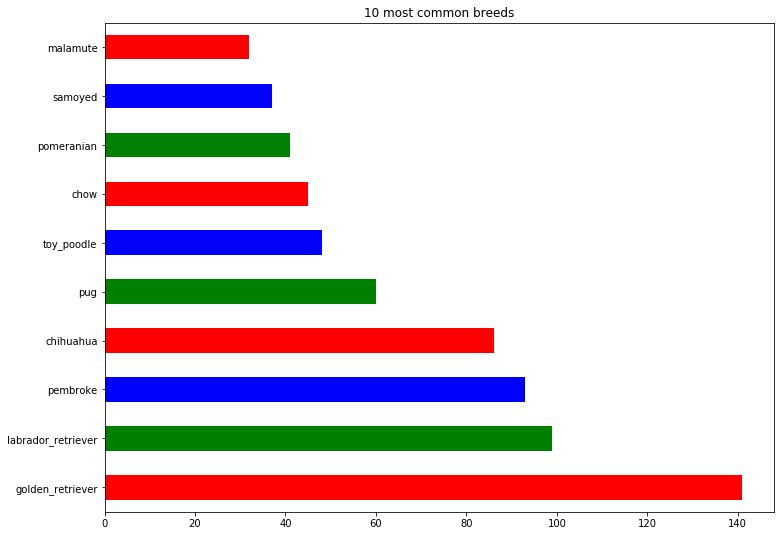

In [288]:
most_10_breeds.plot(kind = 'barh', color=['r', 'g', 'b', 'r', 'g', 'b', 'r', 'g', 'b']);
plt.title('10 most common breeds')
plt.savefig('most10breeds.png')

In [289]:
df_names = master[master['name']!= "nameless"]
most_10_names = df_names.name.value_counts().head(10)
most_10_names

Oliver     10
Cooper     10
Charlie    10
Lucy        9
Winston     8
Sadie       8
Penny       8
Tucker      8
Daisy       7
Toby        7
Name: name, dtype: int64

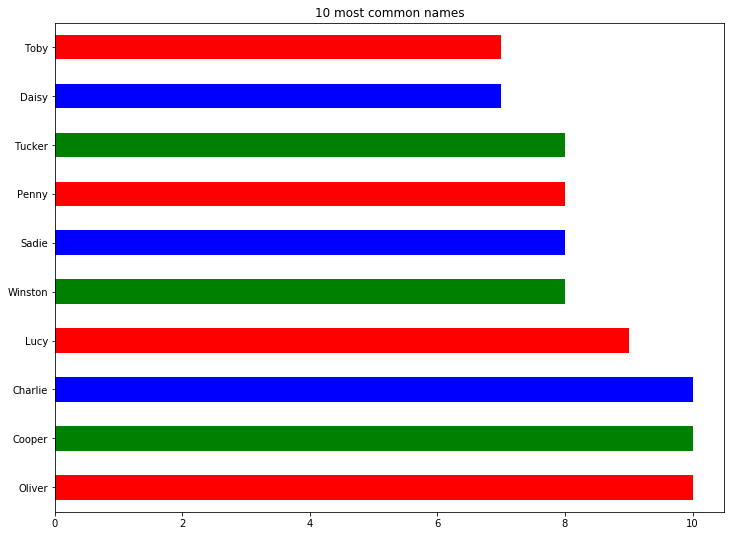

In [290]:
most_10_names.plot(kind = 'barh', color=['r', 'g', 'b', 'r', 'g', 'b', 'r', 'g', 'b']);
plt.title('10 most common names')
plt.savefig('most10names.png')

In [291]:
#generate wordclouds for breeds and names
#Reference: https://www.datacamp.com/community/tutorials/wordcloud-python
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


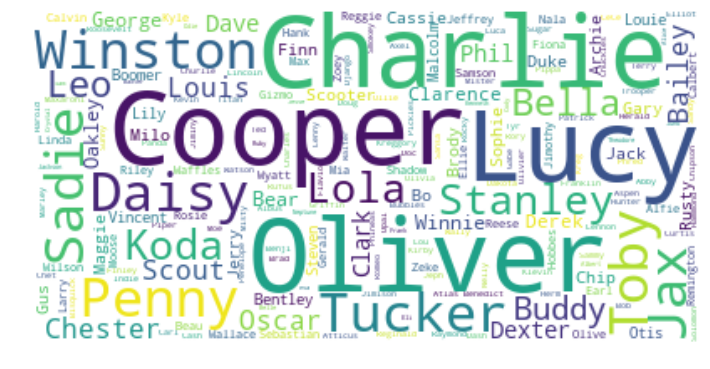

In [292]:
#create list of names 
name_list = df_names['name'].value_counts().index.tolist()

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=60, max_words=200, background_color="white").generate(' '.join(name_list))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("namecloud.png")

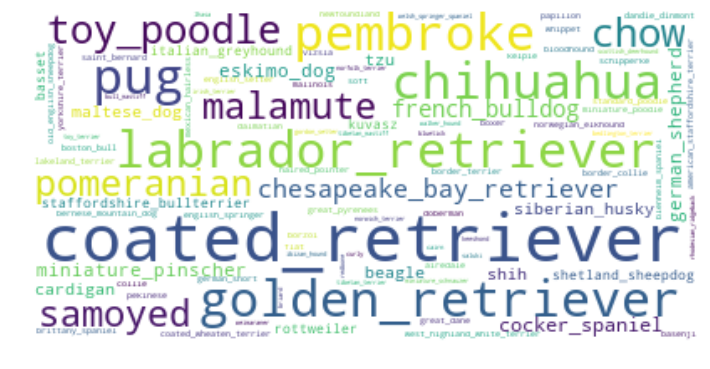

In [293]:
#create list of breeds 
breed_list = df_breeds['breed'].value_counts().index.tolist()

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=70, max_words=300, background_color="white").generate(' '.join(breed_list))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("breedcloud.png")

### 4. Rating according to breed
>Which dog breed got the highest rating?

In [294]:
df_breeds_mean = df_breeds.groupby('breed').mean()
df_breeds_mean.rating.sort_values(ascending = False)

breed
bouvier_des_flandres           13.000000
saluki                         12.500000
briard                         12.333333
irish_setter                   12.333333
border_terrier                 12.142857
standard_schnauzer             12.000000
silky_terrier                  12.000000
tibetan_mastiff                12.000000
gordon_setter                  11.750000
samoyed                        11.702703
golden_retriever               11.585106
wire-haired_fox_terrier        11.500000
australian_terrier             11.500000
great_pyrenees                 11.466667
eskimo_dog                     11.409091
pembroke                       11.408602
chow                           11.377778
greater_swiss_mountain_dog     11.333333
doberman                       11.333333
leonberg                       11.333333
norfolk_terrier                11.333333
irish_water_spaniel            11.333333
kelpie                         11.307692
bernese_mountain_dog           11.272727
clumber   

### 5. Dog stage repartition
>How many are there of each dog type?

In [295]:
#count the number of each dog type 
partition = master[master['dog_stage'] != "None"]
partition = partition.dog_stage.value_counts()
partition

pupper           195
doggo             58
puppo             20
floofer            7
doggo,pupper       5
doggo,floofer      1
doggo,puppo        1
Name: dog_stage, dtype: int64

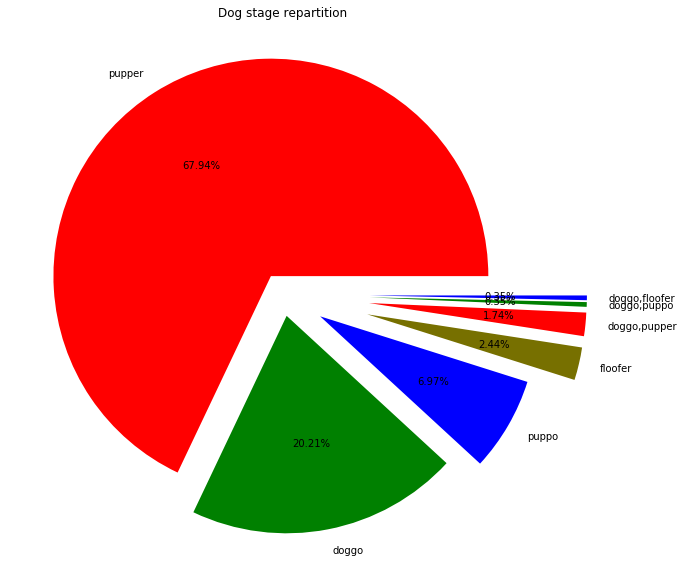

In [310]:
#create pie chart
plt.figure(figsize = [10,10])
partition.sort_values(ascending=False).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(6,6), explode=(0.1, 0.1, 0.2, 0.4, 0.4, 0.4, 0.4),colors = ['r', 'g', 'b','#777000'])
plt.ylabel('')
plt.title('Dog stage repartition')
plt.savefig('DogStages.png')